# ¿Qué es K-means? 

#### K-Means es uno de los algoritmos de clustering más populares. Su objetivo principal es particionar un conjunto de n observaciones en k clusters, donde cada observación pertenece al cluster cuyo centroide (o media) es el más cercano. 
#### Agrupa patrones sin etiquetas previas en K clústeres.
#### Cada patroón se asigna al clúster cuyo centro (centroide ) esté más cercano.
#### Su objetivo es minimizar la varianza intra-cúster.



## Se define como:

####  $$ J = \sum_{k=1}^{K} \sum_{\mathbf{x}_i \in S_k} ||\mathbf{x}_i - \boldsymbol{\mu}_k||^2 $$

Donde: 

$K$ es el número de clusters.
* $S_k$ es el conjunto de puntos de datos pertenecientes al cluster $k$.
* $\boldsymbol{\mu}_k$ es el centroide del cluster $S_k$.
* $||\mathbf{x}_i - \boldsymbol{\mu}_k||^2$ es el cuadrado de la distancia euclidiana entre el punto de datos $\mathbf{x}_i$ y el centroide $\boldsymbol{\mu}_k$ de su cluster asignado.


## Centroide: 
Son una medida de tendencia central. 
Al rededor de los centroides agrupamos patrones con características similares, el centroide representa la media de esas características similares

## Pasos para la implementación

### Importar las librerías básicas

In [435]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

## Generación del dataSet

In [436]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Visualización del data set

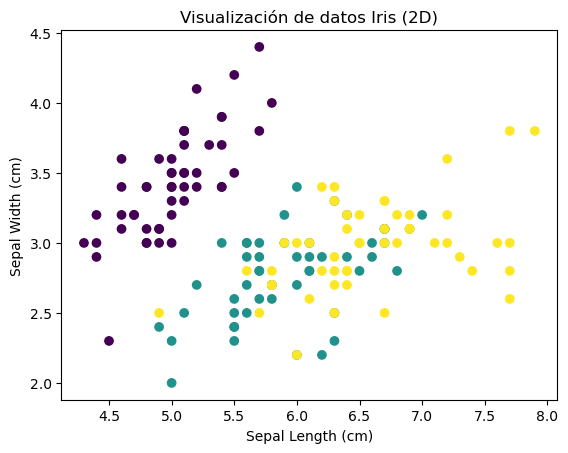

In [437]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Visualización de datos Iris (2D)")
plt.show()

## Método del codo

Es una técnica visual para elegir el número óptimo de clusters (k) cuando usas K-Means. El objetivo es encontrar ese punto mágico donde agregar más clusters ya no mejora mucho el resultado… como cuando sigues agregando condimentos y ya no cambia el sabor.

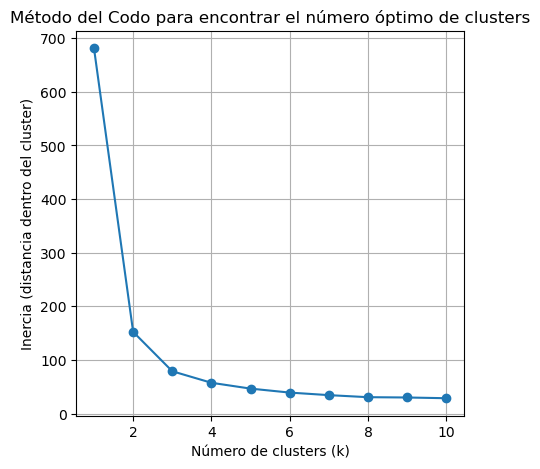

In [438]:
scaler = StandardScaler()
inertia = []                   
k_values = range(1, 11)  
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)         # Entrenamos el modelo con los datos normalizados
    inertia.append(kmeans.inertia_)  # Guardamos la inercia

# Paso 4: Graficar el método del codo
plt.figure(figsize=(5, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Método del Codo para encontrar el número óptimo de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (distancia dentro del cluster)")
plt.grid(True)
plt.show()

## Uso de K-means

In [ ]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)  # X es tu conjunto de datos


KMeans(n_clusters=3, random_state=100000)

In [440]:
etiquetas = kmeans.labels_           # Qué cluster asignó a cada dato
centros = kmeans.cluster_centers_  # Coordenadas de los centros

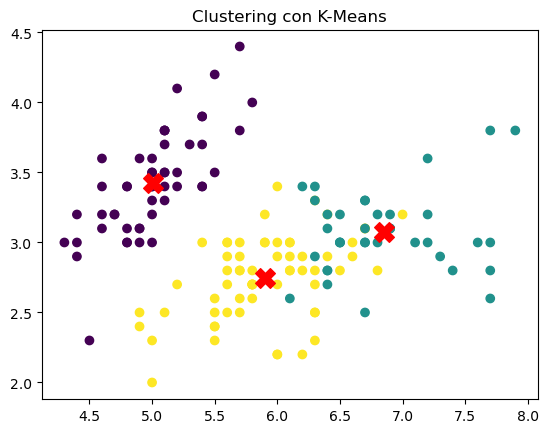

In [441]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=etiquetas)
plt.scatter(centros[:, 0], centros[:, 1], s=200, c='red', marker='X')
plt.title("Clustering con K-Means")
plt.show()

## Uso de predict para saber a que cluster pertenece

In [442]:
nuevos_datos = [[5.1, 3.5, 1.4, 0.2]] 
cluster = kmeans.predict(nuevos_datos)
print(f"Esta flor cae en el clúster {cluster[0]}")

Esta flor cae en el clúster 0
